Welcome to the EPISOL Colab Playground!



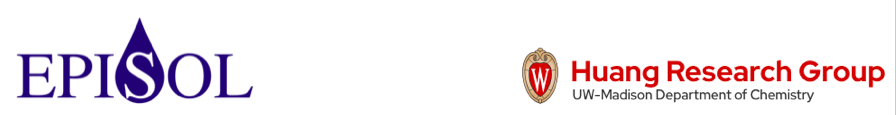

The 3D reference interaction site model (3DRISM) provides an efficient grid-based solvation model to compute the structural and thermodynamic properties of biomolecules in aqueous solutions, in this notebook we will walk through two examples: a neutral, and charged solute.
* goals:
  * Walkthrough the episol software and understand commands and what they do
  * Perform 3DRISM calculations on small molecules and visualize output
  * Be able to perform similar calculations on your own molecules
    * use the colab-notebook to download and run calculations on your own molecules

Please citate the following papers for Epipy and EPISOL:

    * A Python Tutorial for 3DRISM Solvation Calculations of Chemical and Biological Molecules", Swanson, P., Cao, S., Huang, X, https://chemrxiv.org/engage/chemrxiv/article-details/68a6903c728bf9025e6c91ed

    * EPISOL: A Software Package with Expanded Functions to Perform 3D-RISM Calculations for the Solvation of Chemical and Biological Molecules“, Cao, S.; Kalin, M.L.; Huang, X., J. Comput. Chem., 44, 1536-1549, (2023)



* for the offline version, we assume you will have downloaded Episol and epipy.
* the only packages we use in this tutorial are MDAnalysis and Matplotlib

In [10]:
#@title import our packages
import matplotlib.pyplot as plt
import numpy as np
from MDAnalysis.transformations import center_in_box
from episol import epipy

In [33]:
!wget https://raw.githubusercontent.com/EPISOLrelease/EPIPY/refs/heads/main/tutorials/methane.top
!wget https://raw.githubusercontent.com/EPISOLrelease/EPIPY/refs/heads/main/tutorials/methane.gro


--2025-09-09 20:07:20--  https://raw.githubusercontent.com/EPISOLrelease/EPIPY/refs/heads/main/tutorials/methane.top
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1799 (1.8K) [text/plain]
Saving to: ‘methane.top’

methane.top         100%[===================>]   1.76K  --.-KB/s    in 0s      

2025-09-09 20:07:20 (27.3 MB/s) - ‘methane.top’ saved [1799/1799]

--2025-09-09 20:07:20--  https://raw.githubusercontent.com/EPISOLrelease/EPIPY/refs/heads/main/tutorials/methane.gro
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 270 [te

#**Walk Through Calculation:**


* First we initialize the epipy class
* All we need are a topology, and structure file
* for epipy the default solvent is water

In [34]:
from episol import epipy

In [35]:
methane = epipy('methane.gro','methane.top')


* the most import part of any calculation are the paths
* if you are not running in the main Episol folder we must specifiy paths to our solvent and solute files
* Epipy will default to use water as a solvent, and all neeccessary files are kept in site-packages
* this can be useful if you have a topology file generated in a different folder (i.e. gromacs), episol will never alter any files, only read and create new
* by default the rism executable should be set to global path but we will set it regardless
* we can double check where the executable is installed bt calling get_rism_path

In [36]:
print('Our (default) solvent is in',methane.solvent_path)
print('Our solute is in',methane.solute_path)
print('Our output file will be named:',methane.log)
print('episol executable is in:',methane.get_eprism_path)

Our (default) solvent is in /usr/local/lib/python3.12/dist-packages/episol/
Our solute is in 
Our output file will be named: methane_out
episol executable is in: /usr/local/bin/


* we can check which version of episol we are using

In [37]:
methane.get_version()

'1.2.6'

* If you ever get stuck we can search for a desired command string
* for example, if we want to know more about charge we can specify 'coulomb'

In [38]:
methane.get_help('coulomb')

eprism3d 1.2.6 (c) 2022 Cao Siqin
 10     -rc 1                   interaction cutoff for LJ and Coulomb
 53     -Yukawa/YukawaFFT       = -Coulomb YukawaFFT
 67                             Coulomb, dielect/dm, Yukawa/YukawaFFT
 88         [Coulomb-]renorm[alization] allow/forbid Coulomb renormalization in RISM
 94     -dielect-hi             dielect const for Coulomb based HI theories
115     -rlj, -rcoul            LJ/Coulomb cutoff, -rc for both, default: 1
 # EPRISM3D is free software. You can use, modify or redistribute under the
 # terms of the GNU Lesser General Public License v3:
 # https://www.gnu.org/licenses/lgpl-3.0.en.html


in our calculation we produce two output files, one log file which contains the command information, SCF iterations and any errors, and one output file containing our results from the RISM calculation. We will discuss the contents further down
* We recomend naming your files rather than using the default 'episol_out' as the program automatically appends to a file sharing the same name

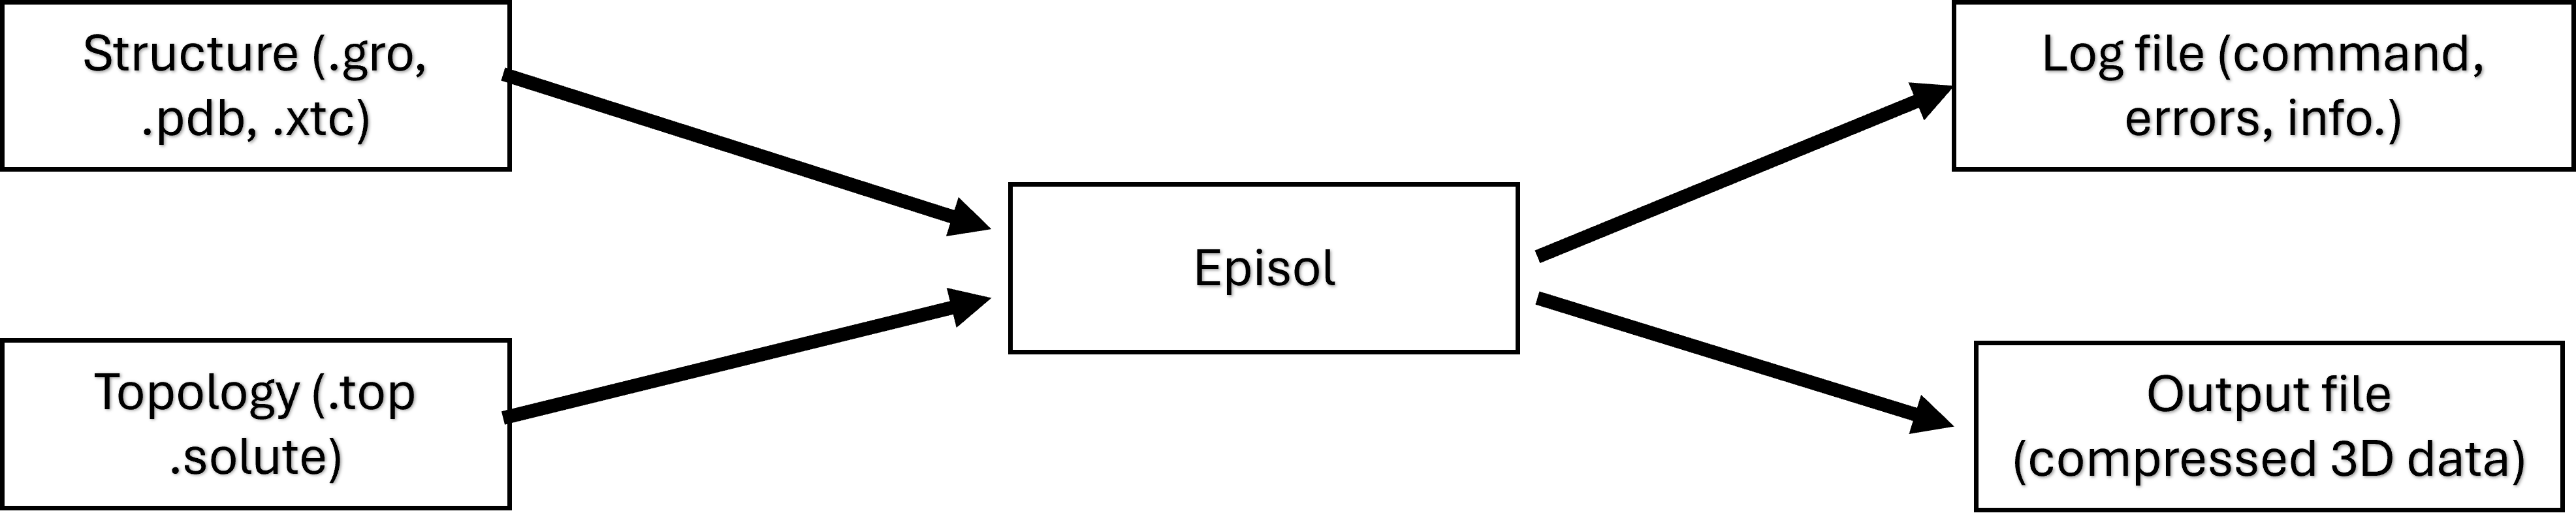

* next we tell Episol to report our desired values into the log file
* using the default reports all values: $-T\Delta S$, molar volume, total LJ, coulombic energy etc.

In [39]:
methane.report('methane_tutorial',args=('all'))

* Most importantly we need to feed the program a structure file for our molecule of interest, and its corresponding topology file
* the standard download of Episol from github includes methane topoloy and structure file
* if you want to use a different solute, all you need is the proper structure (XTC, gro, pdb) file and topology file
* the default solvent is tip3p water from amber14
* if you want to include a different solvent, you must include solvent inter-and intra correlations


* A crucial part to a 3DRISM calculation is the resolution
* resolution is defined in angstroms, and a very small value will give more accurate results, however, at the cost of RAM and time
* we can simply specify the resolution we want (default is 1$\mathring{A}$)
* for larger systems, a tight resolution is not as important

In [22]:
methane.rism(resolution=0.5)

* we can see the results of changing the calculation resolution
* it will change the amount of grids we 'cut' our box into

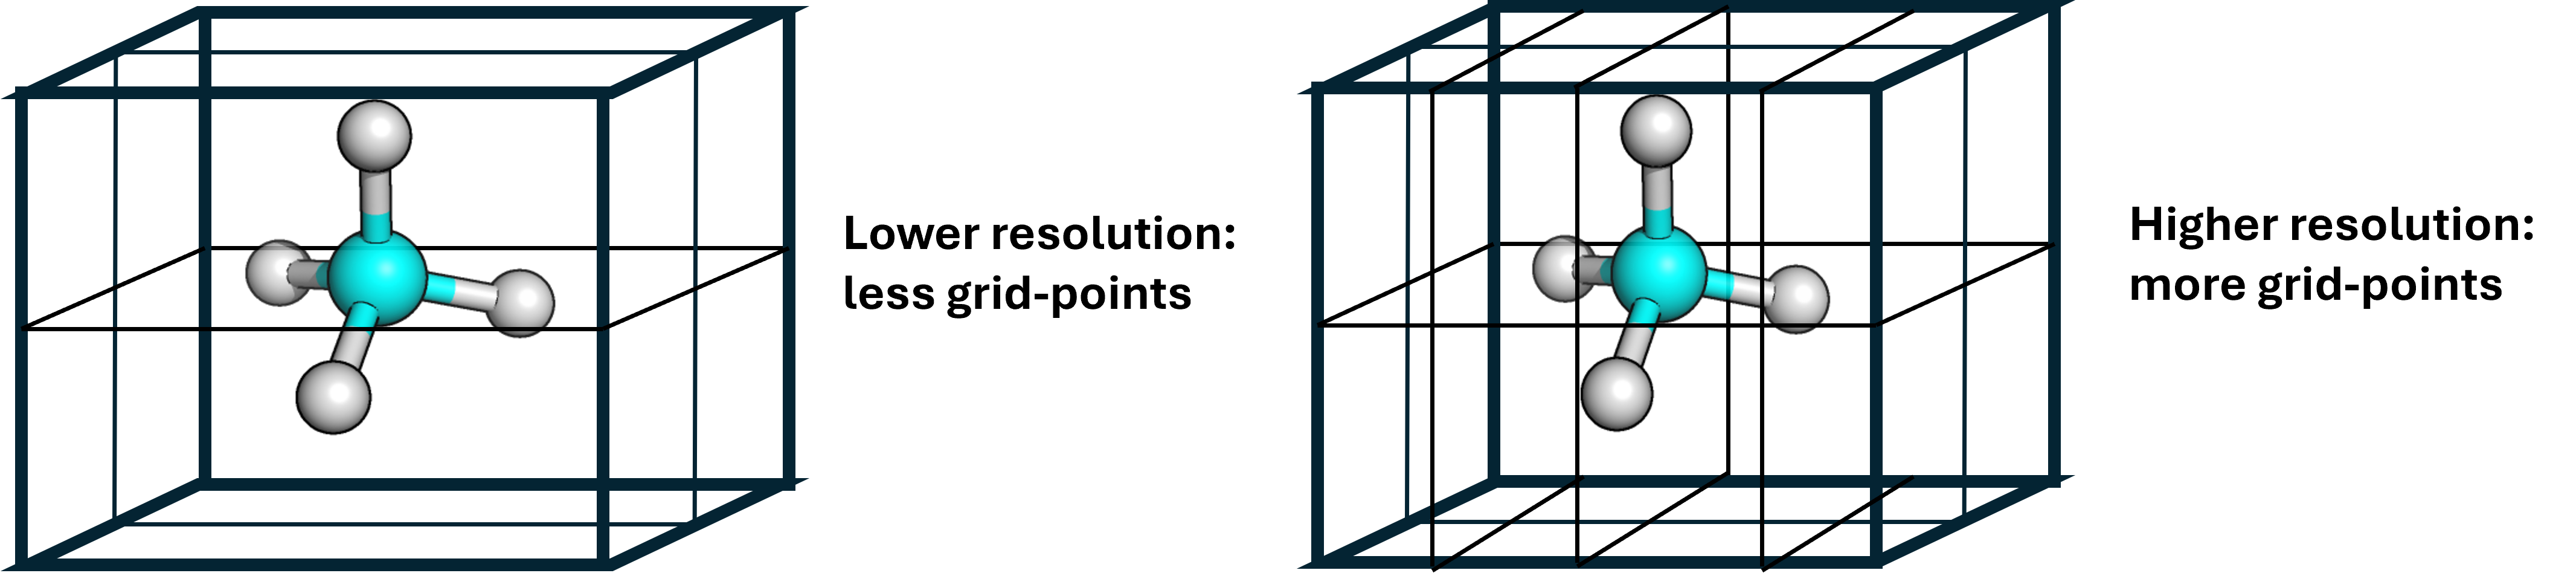

In [40]:
methane.grid

[30.0, 30.0, 30.0]

* a smaller resolution will result in more grid-points for Episol to calculate

In [41]:
methane.rism(resolution=1)
methane.grid

[30.0, 30.0, 30.0]

* more grid-points will result in our calculation taking longer
* a longer calculation may not converge within a given number of steps
* for convergence tolerance and steps the default is 1e-08 and 1000 steps
* usually better to have a tight convergence but the calculation will finish even if convergence is not reached
* if this is the case Episol will let us know
* lets set a less-strict convergence criteria

In [42]:
methane.rism(step=500)
methane.err_tol = 1e-06

* perhaps we are unsure of how much time the calculation will take
* we can run a test that will give a good estimate of RAM
* this will also spit out any errors into our log file, so it exists as a good pre-flight check to ensure our final calculation runs smoothly

In [43]:
methane.test()

'34.59MB'

* now we run!
    * ≈ 1s


In [44]:
methane.kernel()

Calculation finished in 71 steps 
err_tol: 1e-06 actual: 9.22813e-07 


**visualizing resutls**

The 3DRISM calculation results in two output files
1. **log file (.log)** containing the command, and SCF error tolerance, and any errors that mightve occured in the calculation
2. **compressed output file (.ts4s)** containg the resulting compressed data of the calculation on the 3-dimensional grid
  * these values include $g(r)$, coulombic energy, LJ energy (etc. etc.) at **each** grid point
  * you can extract any value you want, but for the remainder of the tutorial we will focus only on $g(r)$

The output .ts4s file is compressed because when working with larger solutes, storing data becomes tricky and holding _all_ the grid values in RAM would be hubris...
* the .ts4s file contains a list of each value we can extract
* if we arent sure which value we want to extract we can list the values in the .ts4s file
  * note: we saved ALL possible outputs which is not recommended due to space

In [ ]:
methane.dump(list_values=True)

1  cmd@1 # eprism3d 1.2.6 2025-08-20,19:48:30
@8ff5089297b4:/content$ eprism3d -f ./episol/release/solute/methane.gro -s ./episol/release/solute/methane.top -p /usr/local/lib/python3.12/dist-packages/episol/tip3p-amber14.01A.gaff -coulomb coulomb -rc 1 -T 298 -log methane_tutorial.log -nr 30.0x30.0x30.0 -ndiis 5 -errtolrism 1e-06 -delvv 0.5 -dynamic-delvv 1 -pwd ./ -o methane_tutorial -cmd closure=PSE3 rism,step=500 report:all save:all -nt 1 -v 1
2   lj@1, real8:30x30x30x2 # eprism3d 1.2.6 2025-08-20,19:48:30
3 coul@1, real8:30x30x30x1 # eprism3d 1.2.6 2025-08-20,19:48:30
4   ef@1, real8:30x30x30x3 # eprism3d 1.2.6 2025-08-20,19:48:30
5 rmin@1, real8:30x30x30x2 # eprism3d 1.2.6 2025-08-20,19:48:30
6  uuv@1, real8:30x30x30x2 # eprism3d 1.2.6 2025-08-20,19:48:30
7  ulr@1, real8:30x30x30x2 # eprism3d 1.2.6 2025-08-20,19:48:30
8  cuv@1, real8:30x30x30x2 # eprism3d 1.2.6 2025-08-20,19:48:30
9  clr@1, real8:30x30x30x2 # eprism3d 1.2.6 2025-08-20,19:48:30
10  huv@1, real8:30x30x30x2 # eprism3

* Extracting files this way can be cumbersome, so lets use a more-user friendly function
* using select_grid we can specify an input string to extract
* this will automatically extract the compressed output file and pass it to an array
* guv = $g_{uv}(\vec{r})$


In [ ]:
g_r = methane.select_grid('guv')

* the array will have a size acording to how many grid-points (_i.e._ resolution) we used
* we used a resolution of 1 $\mathring{A}$, and our box size was 3nm, so our output array will have a size of $3nm\times{10\mathring{A}\over 1nm} = 30$

In [ ]:
g_r.shape

(30, 30, 30)

* we can now visualize our results

Text(0.5, 0.98, '$g(\\vec{r})$ at slice 9 $\\mathring{A}$')

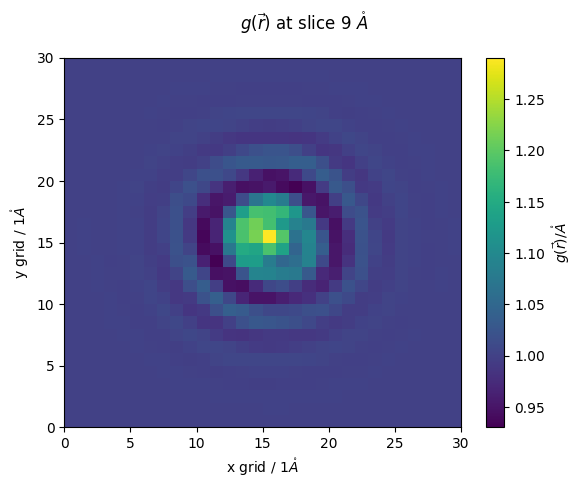

In [ ]:

z_slice = 9 # @param {type:"slider", min:1, max:30, step:1}
fig,ax = plt.subplots()
#z_slice = 10
p = ax.pcolormesh(g_r[z_slice])
ax.set_ylabel(f'y grid / {methane.resolution}$\\mathring{{A}}$')
ax.set_xlabel(f'x grid / {methane.resolution}$\\mathring{{A}}$')

fig.colorbar(p,ax=ax, label="$g(\\vec{r})/\\mathring{{A}}$")
fig.suptitle(f'$g(\\vec{{r}})$ at slice {z_slice*methane.resolution} $\\mathring{{A}}$')

* as you can see our resolution was rather poor
* lets redo at a higher resolution
    * << 1min

In [ ]:
methane.report('methane_res_05A') # now we write out to a new set of files
methane.rism(resolution=0.5)
methane.kernel()
high_res_g_r = methane.select_grid('guv')

Calculation finished in 57 steps 
err_tol: 1e-06 actual: 9.10162e-07 


Text(0.5, 0.98, '$g(\\vec{r})$ at slice 4.5 $\\mathring{A}$')

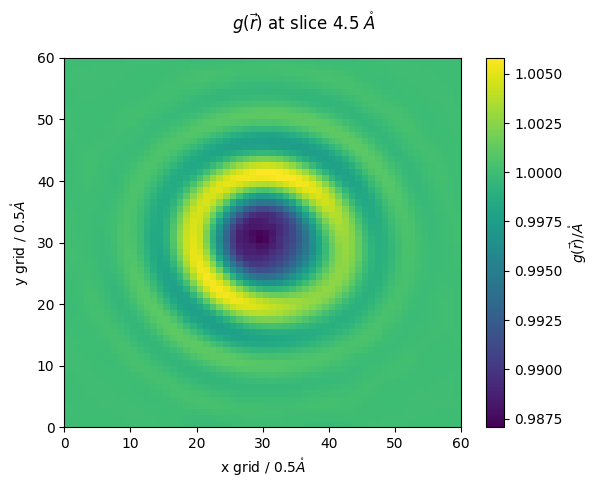

In [ ]:
z_slice = 9 # @param {type:"slider", min:1, max:30, step:1}
fig,ax = plt.subplots()
#z_slice = 10
p = ax.pcolormesh(high_res_g_r[z_slice])
ax.set_ylabel(f'y grid / {methane.resolution}$\\mathring{{A}}$')
ax.set_xlabel(f'x grid / {methane.resolution}$\\mathring{{A}}$')

fig.colorbar(p,ax=ax, label="$g(\\vec{r})/\\mathring{{A}}$")
fig.suptitle(f'$g(\\vec{{r}})$ at slice {z_slice*methane.resolution} $\\mathring{{A}}$')

* we can also export the grid values to a IBM .dx file which can be visualized in pymol and VMD

In [ ]:
methane.reader(file_in='guv_methane_tutorial.txt',file_out='guv_methane',dx=True)

## **Charged Species Example: Nitrous Ion**

Episol utilizes a novel approach to ion-dipole interactions, correctly accounting for two-body positions-dependent intramolecular correlations of solvent and solute. This Method was developed by our lab and is currently the only RISM software to include this correction. We will walk through examples of 3DRISM calculations using this ion-dipole correction (IDC) in the following example.

for more see: https://doi.org/10.1021/acs.jpcb.2c04431
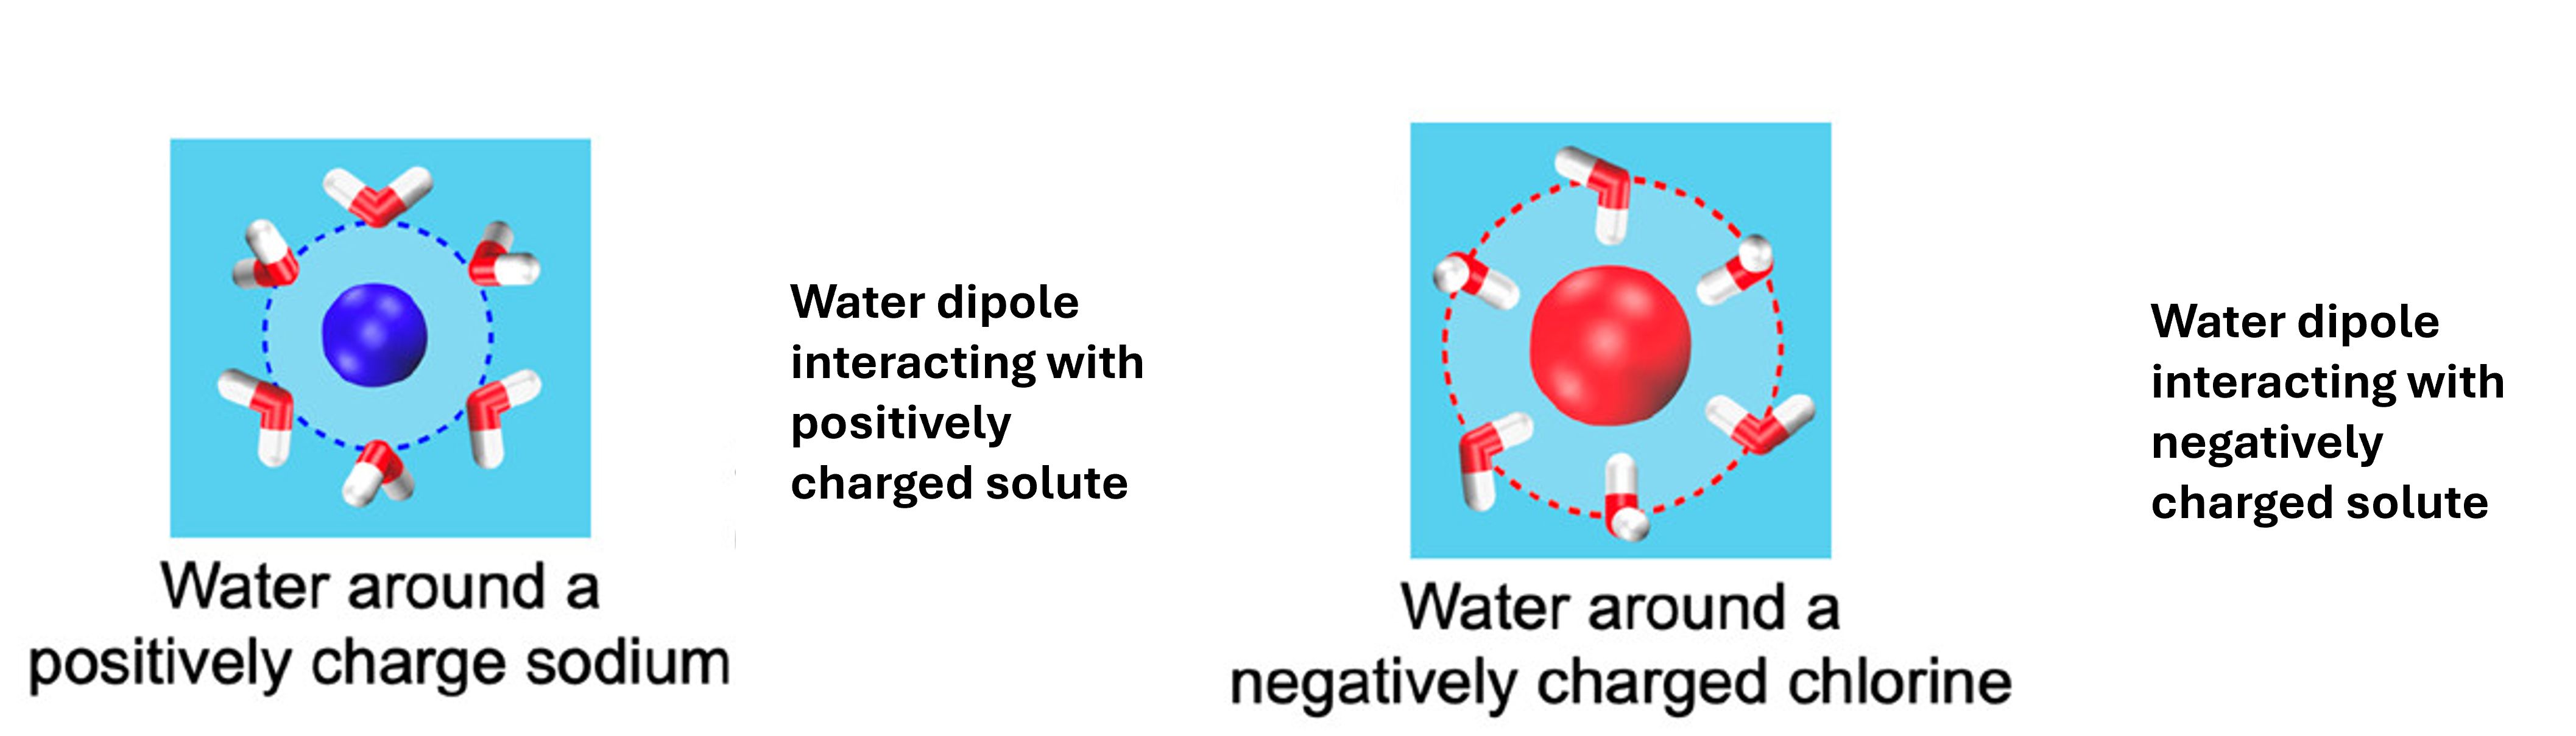

* First lets pick out charged solute: Nitrous Acid

* However, although we have a coordinate file we are short a topology file and must generate our own
* if you are running locally you can generate topologies using OpenMM or Gromacs and specifiy their path and Episol will read them no problem


* Now that we have our coordinate file and topology file, lets run, follow the same procedure as above
* we recommend using higher resolution for small charged solutes (here we use the max)
  * ≈ 1min

In [19]:
!wget https://raw.githubusercontent.com/EPISOLrelease/EPIPY/refs/heads/main/tutorials/nitrous.top
!wget https://raw.githubusercontent.com/EPISOLrelease/EPIPY/refs/heads/main/tutorials/nitrous_.gro

--2025-09-09 19:51:39--  https://raw.githubusercontent.com/EPISOLrelease/EPIPY/refs/heads/main/tutorials/nitrous.top
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1285 (1.3K) [text/plain]
Saving to: ‘nitrous.top’

nitrous.top         100%[===================>]   1.25K  --.-KB/s    in 0s      

2025-09-09 19:51:39 (73.6 MB/s) - ‘nitrous.top’ saved [1285/1285]

--2025-09-09 19:51:39--  https://raw.githubusercontent.com/EPISOLrelease/EPIPY/refs/heads/main/tutorials/nitrous_.gro
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194 [t

In [21]:
nitrous_ = epipy('nitrous_.gro','nitrous.top')
nitrous_.err_tol = 1e-08
nitrous_.rism(step=1000,resolution=0.25) # we will use maximum resolution!
nitrous_.kernel()

Calculation finished in 114 steps 
err_tol: 1e-08 actual: 9.61136e-09 


* like previous, lets uncompress our output file and select density

In [22]:
n_g_r = nitrous_.select_grid('guv')
n_g_r.shape

(120, 120, 120)

Text(0.5, 0.98, '$g(\\vec{r})$ at x-slice 15.0 $\\mathring{A}$')

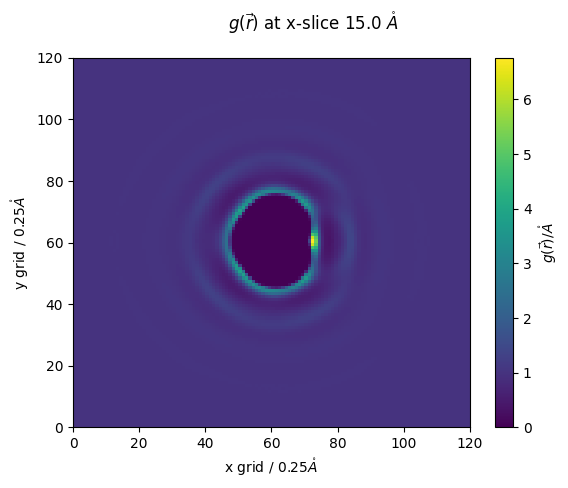

In [23]:
z_slice = 60 # @param {type:"slider", min:1, max:120, step:1}
fig,ax = plt.subplots()
#z_slice = 10
p = ax.pcolormesh(n_g_r[:,:,z_slice])
ax.set_ylabel(f'y grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax.set_xlabel(f'x grid / {nitrous_.resolution}$\\mathring{{A}}$')
fig.colorbar(p,ax=ax, label="$g(\\vec{r})/\\mathring{{A}}$")
fig.suptitle(f'$g(\\vec{{r}})$ at x-slice {z_slice*nitrous_.resolution} $\\mathring{{A}}$')

# **Now lets try with ion dipole correction**

* ⚠ ⚠ ⚠ the _only_ thing that will change is the input toplogy file ⚠ ⚠ ⚠
* we will use Episol to transform a topology to an IDC-equipped .solute file
* this is done by specifiying gen_idc=True when loading our solute


In [26]:
idc_nitrous = epipy('nitrous_.gro','nitrous.top',gen_idc=True)

converted nitrous.top to nitrous.solute
generated idc-enabled solute file to: idc_nitrous.solute


* thats it! everything else is the same
* now we are readyfor our IDC calculation
  * ≈ 1min

In [27]:
idc_nitrous.report('idc_nitrous')
idc_nitrous.err_tol=1e-08
idc_nitrous.rism(step=1000,resolution=0.25)
idc_nitrous.kernel()

Calculation finished in 147 steps 
err_tol: 1e-08 actual: 9.13287e-09 


* as before, we unpack our compressed output and read into an array

In [28]:
g_r_idc = idc_nitrous.select_grid('guv')

(20.0, 100.0)

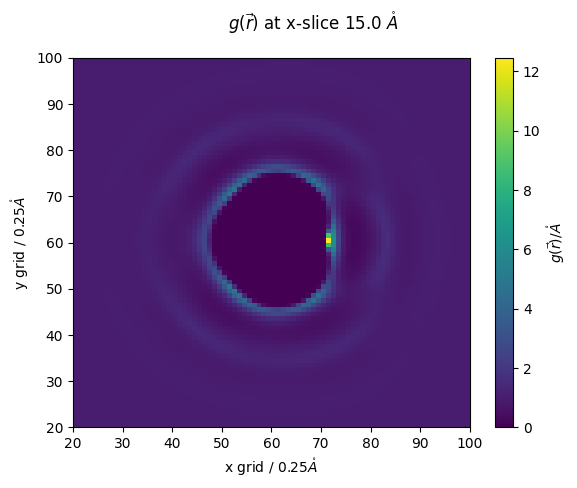

In [29]:
z_slice = 60 # @param {type:"slider", min:1, max:120, step:1}
fig,ax = plt.subplots()
#z_slice = 10
p = ax.pcolormesh(g_r_idc[:,:,z_slice])
ax.set_ylabel(f'y grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax.set_xlabel(f'x grid / {nitrous_.resolution}$\\mathring{{A}}$')
fig.colorbar(p,ax=ax, label="$g(\\vec{r})/\\mathring{{A}}$")
fig.suptitle(f'$g(\\vec{{r}})$ at x-slice {z_slice*nitrous_.resolution} $\\mathring{{A}}$')
ax.set_ylim(20,100)
ax.set_xlim(20,100)

* lets compare results

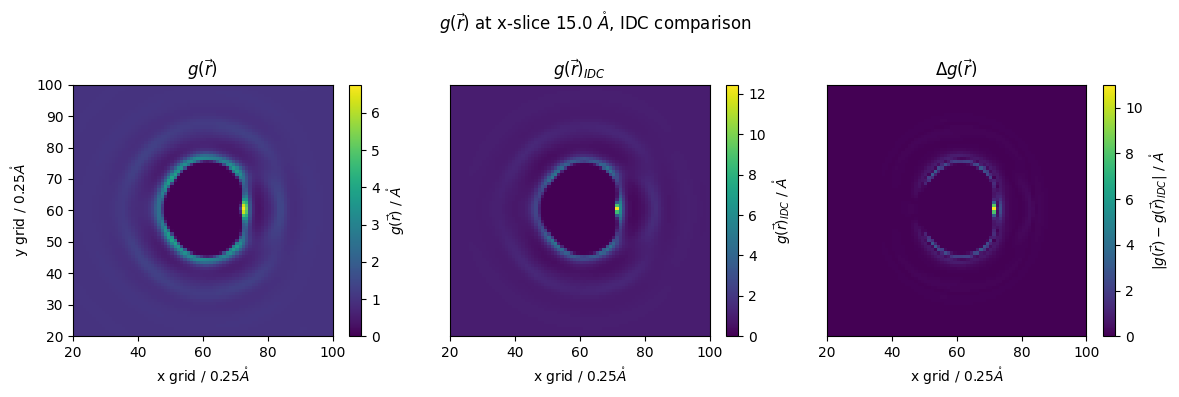

In [30]:
z_slice = 60 # @param {type:"slider", min:1, max:120, step:1}
#g_r_idc = nitrous_.reader(file_in='guv_idc_nitrous.txt')
#g_r = nitrous_.reader(file_in='guv_nitrous.txt')

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

p1 = ax1.pcolormesh(n_g_r[:,:,z_slice])
ax1.set_ylabel(f'y grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax1.set_xlabel(f'x grid / {nitrous_.resolution}$\\mathring{{A}}$')
#ax1.colorbar(p,ax=ax, label="$g(\\vec{r})/\\mathring{{A}}$")
fig.colorbar(p1,ax=ax1, label="$g(\\vec{r})$ / $\\mathring{{A}}$")
#ax1.set_yticks([])
ax1.set_title("$g(\\vec{r})$")
ax1.set_ylim(20,100)
ax1.set_xlim(20,100)

p2 = ax2.pcolormesh(g_r_idc[:,:,z_slice])
#ax2.set_ylabel(f'y grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax2.set_xlabel(f'x grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax2.set_title("$g(\\vec{r})_{IDC}$")
fig.colorbar(p2,ax=ax2, label="$g(\\vec{r})_{IDC}$ / $\\mathring{{A}}$")
ax2.set_yticks([])
ax2.set_ylim(20,100)
ax2.set_xlim(20,100)

p3 = ax3.pcolormesh(np.abs(g_r_idc[:,:,z_slice]-n_g_r[:,:,z_slice]))
#ax3.set_ylabel(f'y grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax3.set_xlabel(f'x grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax3.set_title("$\\Delta g(\\vec{r})$")
fig.colorbar(p3,ax=ax3, label="$|g(\\vec{r})-g(\\vec{r})_{IDC}|$ / $\\mathring{{A}}$")
ax3.set_yticks([])
ax3.set_ylim(20,100)
ax3.set_xlim(20,100)

fig.suptitle(f'$g(\\vec{{r}})$ at x-slice {z_slice*nitrous_.resolution} $\\mathring{{A}}$, IDC comparison')
fig.tight_layout()

* if we want a more throrough investigation into our density, we can take the molecular desnsity of water, instead of our atomic $g(r)$
* we will just alter our selection string with the keyword 'convolve'
* this we return an array that has been convolved with a gaussian kernel, i.e. 'smoothed' corresponding to the default VdW radius of water

In [31]:
T_n_g_r = nitrous_.select_grid('convolve guv')
T2_g_r_idc = idc_nitrous.select_grid('convolve guv')

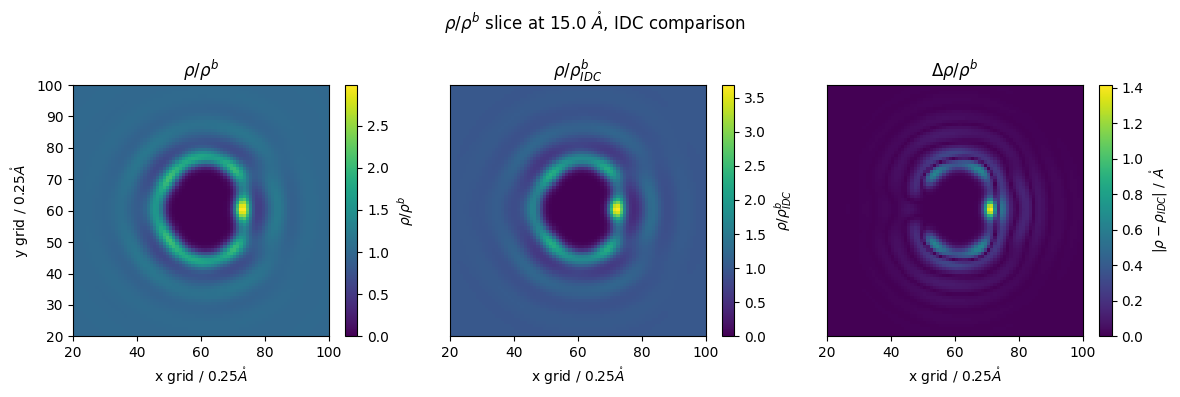

In [32]:
z_slice = 60 # @param {type:"slider", min:1, max:120, step:1}
#g_r_idc = nitrous_.reader(file_in='guv_idc_nitrous.txt')
#g_r = nitrous_.reader(file_in='guv_nitrous.txt')


fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

p1 = ax1.pcolormesh(T_n_g_r[:,:,z_slice])
ax1.set_ylabel(f'y grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax1.set_xlabel(f'x grid / {nitrous_.resolution}$\\mathring{{A}}$')
#ax1.colorbar(p,ax=ax, label="$g(\\vec{r})/\\mathring{{A}}$")
fig.colorbar(p1,ax=ax1, label="$\\rho/\\rho^b $")
#ax1.set_yticks([])
ax1.set_title("$\\rho/\\rho^b$")
ax1.set_ylim(20,100)
ax1.set_xlim(20,100)

p2 = ax2.pcolormesh(T2_g_r_idc[:,:,z_slice])
#ax2.set_ylabel(f'y grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax2.set_xlabel(f'x grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax2.set_title("$\\rho/\\rho^b_{IDC}$")
fig.colorbar(p2,ax=ax2, label="$\\rho/\\rho^b_{IDC}$")
ax2.set_yticks([])
ax2.set_ylim(20,100)
ax2.set_xlim(20,100)

p3 = ax3.pcolormesh(np.abs(T_n_g_r[:,:,z_slice]-T2_g_r_idc[:,:,z_slice]))
#ax3.set_ylabel(f'y grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax3.set_xlabel(f'x grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax3.set_title("$\\Delta \\rho/\\rho^b$")
fig.colorbar(p3,ax=ax3, label="$|\\rho-\\rho_{IDC}|$ / $\\mathring{{A}}$")
ax3.set_yticks([])
ax3.set_ylim(20,100)
ax3.set_xlim(20,100)

fig.suptitle(f'$\\rho/\\rho^b$ slice at {z_slice*nitrous_.resolution} $\\mathring{{A}}$, IDC comparison')
fig.tight_layout()

* we can see that the difference is 1 - 1.4 times!
* this equates to the solvent density being 1.4 times higher without using IDC!

# we are now done with our first walkthrough

* We can also look at local density using a laplacian oof gaussian filter
* this follows the same molecular 'smoothing' procedure but now we take the laplacian of local density to find regions of excess and depleted molecular density
* this will output the laplacian (gradient) of the  our input file
* negative regions correspond to local maxima, or locally dense regions
* positive regions correspond to regions which are locally depleted

In [ ]:
lap_g_r_idc = idc_nitrous.select_grid('LoG guv')

* again, we can perform these for ANY of our output files, not just $g(r)$
* for example local density of Coulombic energy

In [ ]:
g_r2 = idc_nitrous.select_grid('convolve coul')

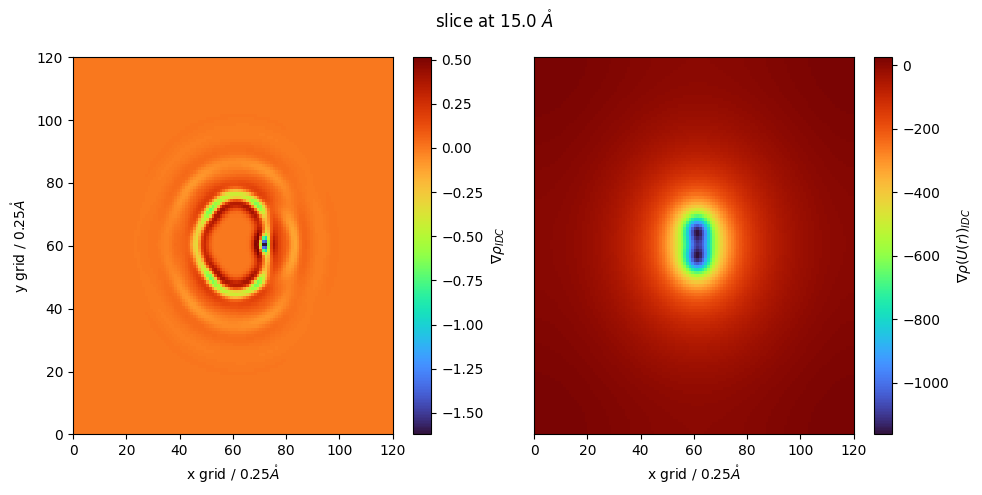

In [ ]:
z_slice = 60 # @param {type:"slider", min:1, max:120, step:1}
fig,(ax,ax1) = plt.subplots(1,2,figsize=(10,5))
#lap_g_r_idc = idc_nitrous.select_grid('grad guv')

cmap = plt.colormaps['turbo']
p = ax.pcolormesh(lap_g_r_idc[:,:,z_slice],cmap=cmap)
p1 = ax1.pcolormesh(g_r2[:,:,z_slice],cmap=cmap)

fig.colorbar(p,ax=ax, label="$\\nabla \\rho_{IDC}$")

fig.colorbar(p1,ax=ax1, label="$\\nabla \\rho(U(r))_{IDC}$")

ax.set_ylabel(f'y grid / {idc_nitrous.resolution}$\\mathring{{A}}$')
ax.set_xlabel(f'x grid / {idc_nitrous.resolution}$\\mathring{{A}}$')
ax1.set_xlabel(f'x grid / {idc_nitrous.resolution}$\\mathring{{A}}$')
ax1.set_yticks([])
fig.suptitle(f'slice at {z_slice*idc_nitrous.resolution} $\\mathring{{A}}$')
fig.tight_layout()

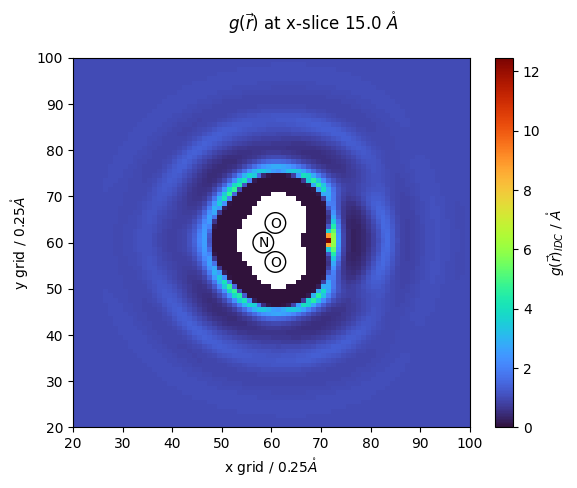

In [ ]:
z_slice = 60 # @param {type:"slider", min:1, max:120, step:1}
#g_r_idc = nitrous_.reader(file_in='guv_idc_nitrous.txt')
fig,ax = plt.subplots()
#z_slice = 10
nit_coords = []
with open('nitrous_.gro','r') as f:
  for line in f:
    tmp = line.split()
    if tmp[0] == '1UNL':
      nit_coords.append([float(tmp[3]),
                         float(tmp[4]),
                         float(tmp[5])])
cmap = plt.colormaps['turbo']
x = np.arange(0,len(g_r_idc))
y = np.arange(0,len(g_r_idc))
z = np.arange(0,len(g_r_idc))
nit_coords = np.array(nit_coords)
r = 1.5/nitrous_.resolution
for val in nit_coords:
  mask = (x[:,np.newaxis,np.newaxis]-val[0]/nitrous_.resolution*10)**2 + (y[np.newaxis,:,np.newaxis]-val[1]/nitrous_.resolution*10)**2 +(y[np.newaxis,np.newaxis,:]-val[2]/nitrous_.resolution*10)**2 < r**2
  g_r_idc[mask] = np.nan
p = ax.pcolormesh(g_r_idc[:,:,z_slice],cmap=cmap)
ax.scatter(nit_coords[:,1]/nitrous_.resolution*10,nit_coords[:,0]/nitrous_.resolution*10,s=220, facecolors='none', edgecolors='black')
#ax.plot(nit_coords[:,0]/nitrous_.resolution*10,nit_coords[:,1]/nitrous_.resolution*10,c='black')
names = ['N','O','O']
for name,x,y in zip(names,nit_coords[:,1]/nitrous_.resolution*10,nit_coords[:,0]/nitrous_.resolution*10):
  ax.text(x-1,y-1,f'{name}')
#fig.colorbar(p,ax=ax)
ax.set_ylim(20,100)
ax.set_xlim(20,100)
ax.set_ylabel(f'y grid / {nitrous_.resolution}$\\mathring{{A}}$')
ax.set_xlabel(f'x grid / {nitrous_.resolution}$\\mathring{{A}}$')
fig.suptitle(f'$g(\\vec{{r}})$ at x-slice {z_slice*nitrous_.resolution} $\\mathring{{A}}$')

fig.colorbar(p,ax=ax, label="$g(\\vec{r})_{IDC}$ / $\\mathring{{A}}$")